# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

In [3]:
df = pd.read_csv('student_performance_data_with_predictions.csv')

# Preprocessing

In [4]:
X = df[['Study Hours', 'Punctuality', 'Year 1 Semester 1 GPA', 'Year 1 Semester 2 GPA', 'Year 2 Semester 1 GPA']]
y = df['Predicted Performance']

# Encode the target variable

In [5]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a pipeline with a scaler and random forest classifier

In [7]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest model
])

# Define the parameter grid for GridSearchCV

In [8]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with cross-validation

In [9]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

# Get the best model from grid search

In [10]:
best_model = grid_search.best_estimator_


# Make predictions

In [11]:
y_pred = best_model.predict(X_test)

# Print evaluation metrics

In [12]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.944
Classification Report:
               precision    recall  f1-score   support

 Distinction       0.92      0.90      0.91        39
Lower Credit       0.97      0.96      0.96       268
Upper Credit       0.92      0.94      0.93       193

    accuracy                           0.94       500
   macro avg       0.94      0.93      0.93       500
weighted avg       0.94      0.94      0.94       500

Confusion Matrix:
 [[ 35   0   4]
 [  0 256  12]
 [  3   9 181]]


# Plot feature importances

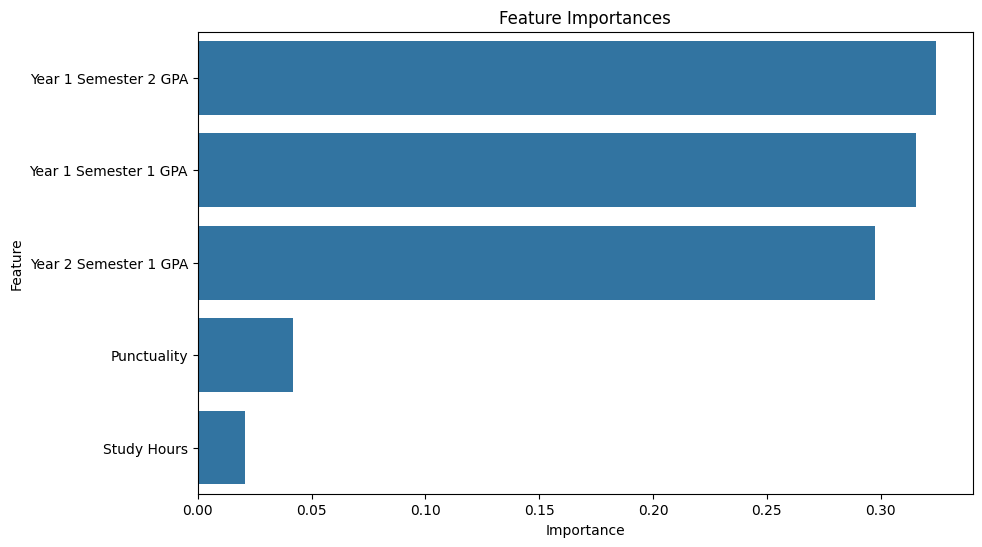

In [13]:
feature_importances = best_model.named_steps['classifier'].feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

# Save the model

In [15]:
joblib.dump(best_model, 'performance_model.joblib')

['performance_model.joblib']